In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

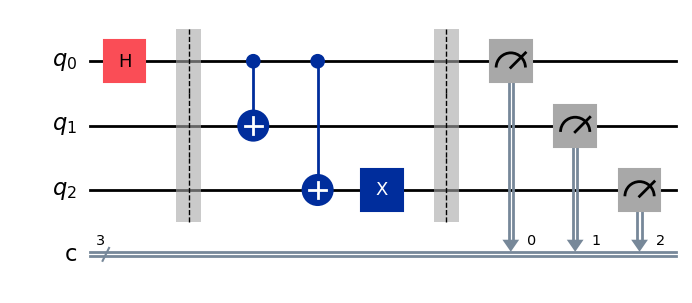

In [ ]:
qc = QuantumCircuit(3, 3)
#Intialize the qubits in the |+> state
qc.h(0)
qc.barrier()
qc.cx(0,1)
qc.cx(0,2)
qc.x(2)
qc.barrier()
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

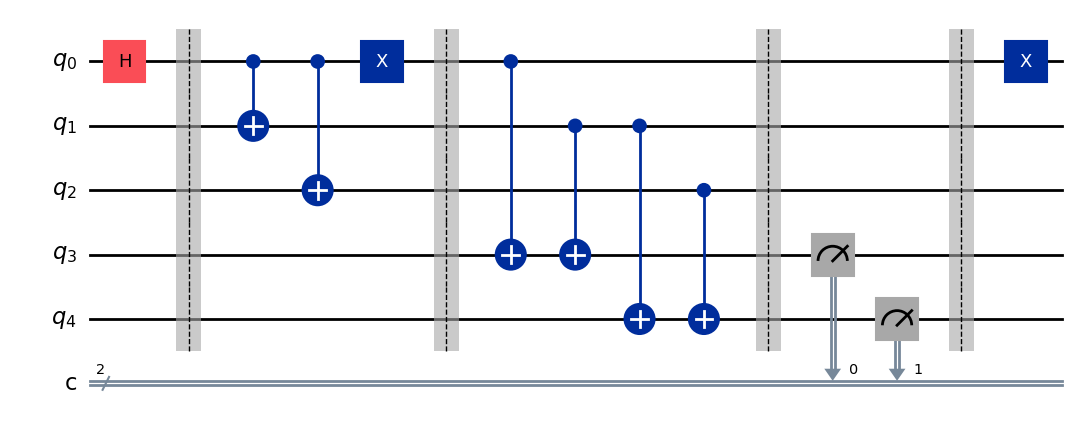

In [20]:
qc_corrected = QuantumCircuit(5, 2)
#input state
qc_corrected.h(0)
qc_corrected.barrier()
#encoding
qc_corrected.cx(0,1)
qc_corrected.cx(0,2)
qc_corrected.x(0) #error (one only)
qc_corrected.barrier()
#syndrome measurement
qc_corrected.cx(0,3)
qc_corrected.cx(1,3)
qc_corrected.cx(1,4)
qc_corrected.cx(2,4)
qc_corrected.barrier()
qc_corrected.measure([3,4],[0,1])
qc_corrected.barrier()
#correction
with qc.if_test((0,0)):
    qc_corrected.x(0)
qc_corrected.draw('mpl')

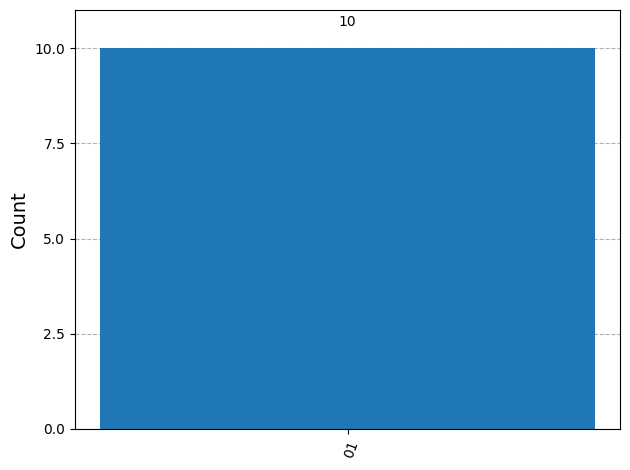

In [19]:
backend = AerSimulator()
job = backend.run(qc_corrected,shots=10)
result = job.result()
counts = result.get_counts(qc_corrected)
plot_histogram(counts)